In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Reading Data file


In [4]:
df = pd.read_csv('./Loan train data.csv')

In [5]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Shape

In [6]:
df.shape

(614, 13)

# Data Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Checking For NULLS

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Replacing Nulls for Categorical values

In [9]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_16112\467076715.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_16112\467076715.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



# Checking For Duplicates

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Converting Object datatypes to Numeric

In [12]:
label_encoder = LabelEncoder()

In [13]:
df = pd.get_dummies(df,columns = ['Property_Area'])
df['Property_Area_Semiurban'] = df['Property_Area_Semiurban'].astype('int')
df['Property_Area_Urban'] = df['Property_Area_Urban'].astype('int')
df['Property_Area_Rural'] = df['Property_Area_Rural'].astype('int')

columns_to_encode = ['Gender', 'Married','Education','Self_Employed', 'Loan_Status']
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [14]:
print(df['Dependents'].unique())

['0' '1' '2' '3+']


In [15]:
df['Dependents'] = df['Dependents'].str.replace(' ', '').str.replace('+', '')
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')
print(df['Dependents'].unique())

[0 1 2 3]


# All Datatypes are Numeric

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   614 non-null    int32  
 2   Married                  614 non-null    int32  
 3   Dependents               614 non-null    int64  
 4   Education                614 non-null    int32  
 5   Self_Employed            614 non-null    int32  
 6   ApplicantIncome          614 non-null    int64  
 7   CoapplicantIncome        614 non-null    float64
 8   LoanAmount               592 non-null    float64
 9   Loan_Amount_Term         600 non-null    float64
 10  Credit_History           564 non-null    float64
 11  Loan_Status              614 non-null    int32  
 12  Property_Area_Rural      614 non-null    int32  
 13  Property_Area_Semiurban  614 non-null    int32  
 14  Property_Area_Urban      6

# Summary statistics for numerical features

In [17]:
print(df.describe())  

           Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000     614.000000   
mean     0.817590    0.653094    0.744300    0.218241       0.133550   
std      0.386497    0.476373    1.009623    0.413389       0.340446   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    1.000000    0.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.0000

# Creating a box plot for each numerical column

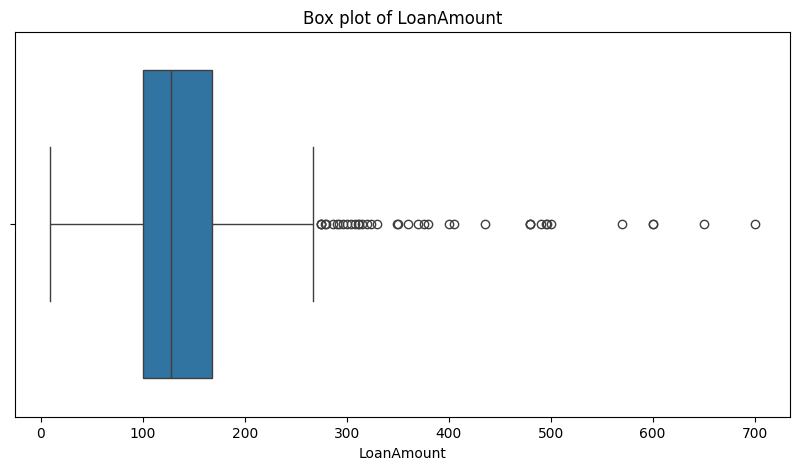

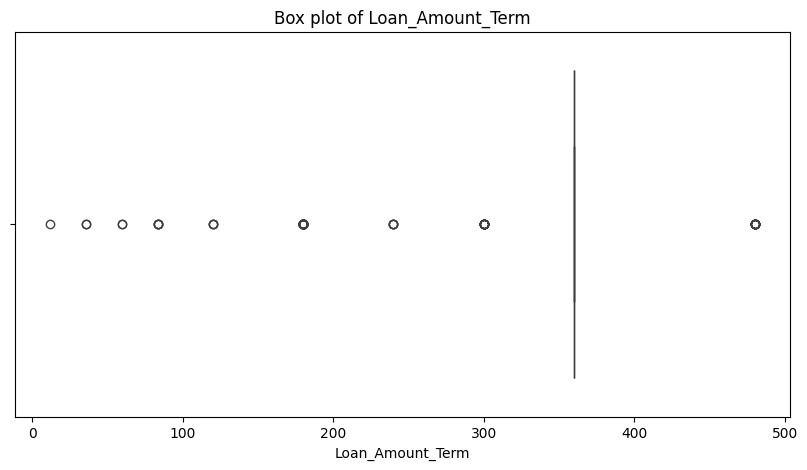

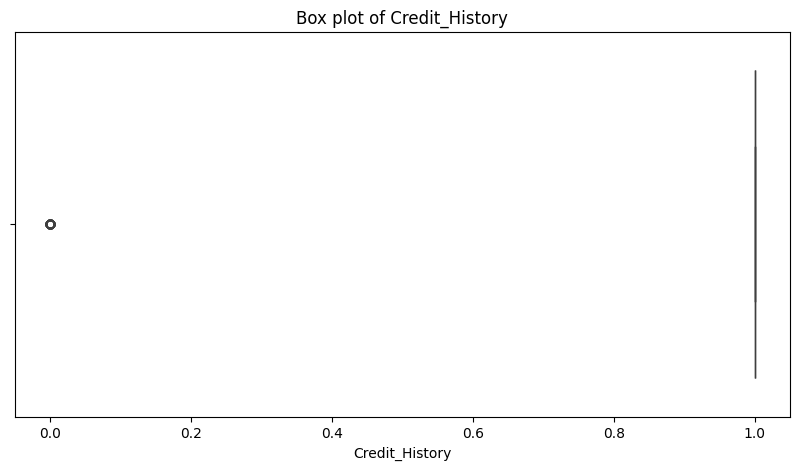

In [18]:
columns_to_draw = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for column in columns_to_draw:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Replacing Nulls For numeric columns

In [19]:
credit_mode_value = df['Credit_History'].mode()[0]
df['Credit_History'].fillna(credit_mode_value, inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_16112\1171207333.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(credit_mode_value, inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_16112\1171207333.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   614 non-null    int32  
 2   Married                  614 non-null    int32  
 3   Dependents               614 non-null    int64  
 4   Education                614 non-null    int32  
 5   Self_Employed            614 non-null    int32  
 6   ApplicantIncome          614 non-null    int64  
 7   CoapplicantIncome        614 non-null    float64
 8   LoanAmount               614 non-null    float64
 9   Loan_Amount_Term         614 non-null    float64
 10  Credit_History           614 non-null    float64
 11  Loan_Status              614 non-null    int32  
 12  Property_Area_Rural      614 non-null    int32  
 13  Property_Area_Semiurban  614 non-null    int32  
 14  Property_Area_Urban      6

In [21]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,1,0,0,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,0,0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,1,0,0,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,0,0,1,0


# Standardize numerical features


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])


# Feature engineering


In [23]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['LoanIncomeRatio'] = df['LoanAmount'] / df['TotalIncome']

# Z-score method

In [24]:
from scipy import stats
z_scores = stats.zscore(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
df = df[(abs(z_scores) < 3).all(axis=1)]


In [25]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,LoanIncomeRatio
0,LP001002,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,1,0,0,1,-0.481497,0.438718
1,LP001003,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,1,0,0,-0.173144,1.220036
2,LP001005,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,1,0,0,1,-0.948235,1.000803
3,LP001006,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,1,0,0,1,-0.210083,1.458641
4,LP001008,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,1,0,0,1,-0.456759,0.123809


# Heat map To check The Impact of other Features on Targer Var

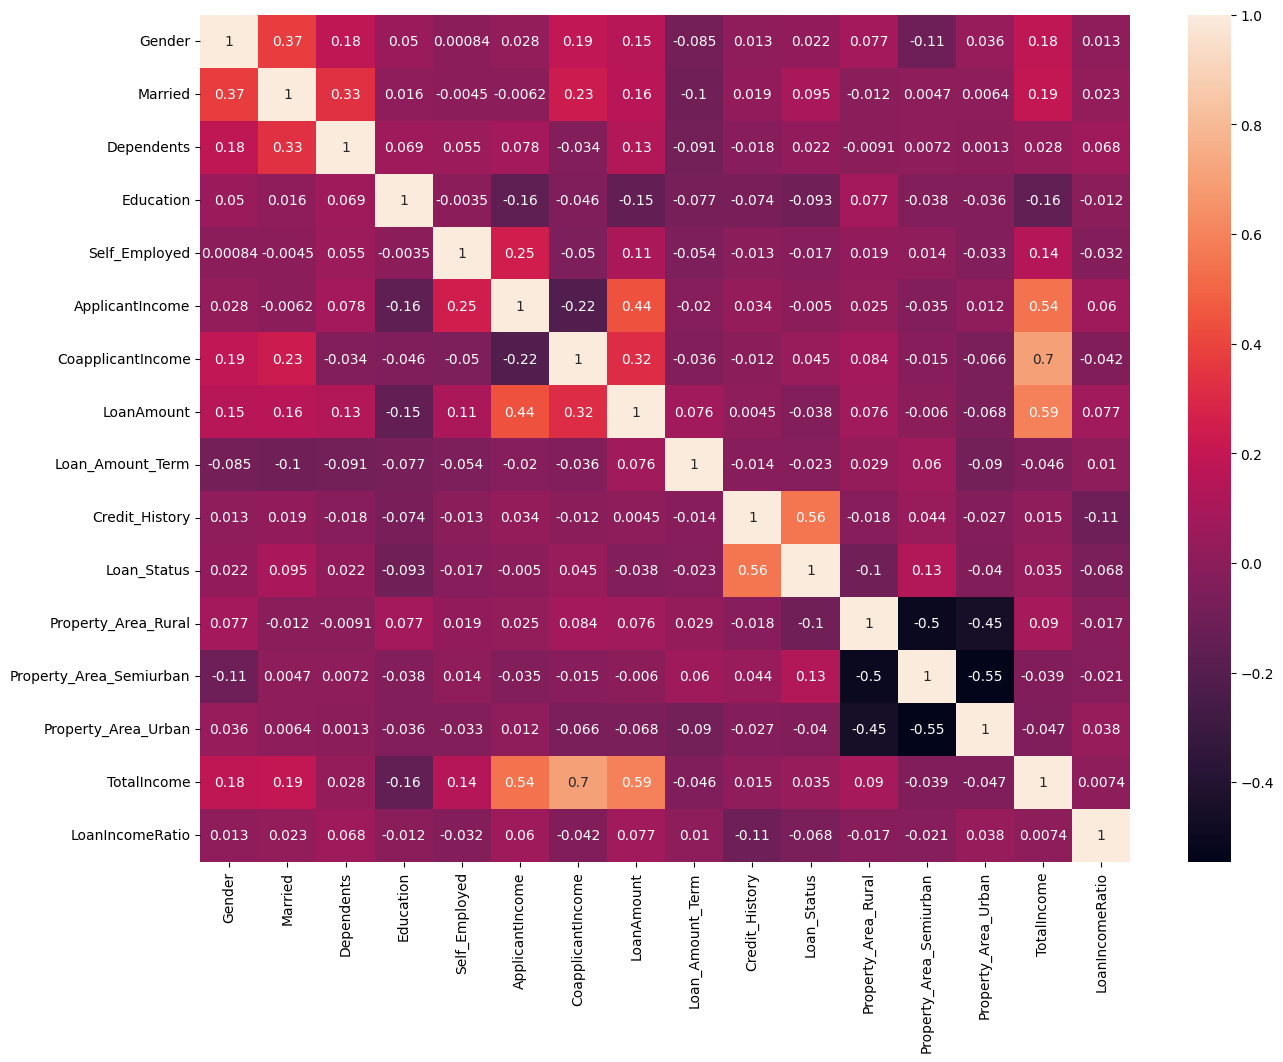

In [26]:
corrleation_matrix = df.select_dtypes(include='number').corr()
corrleation_matrix
plt.figure(figsize=(15, 11))
sns.heatmap(data=corrleation_matrix, annot=True)
plt.show()

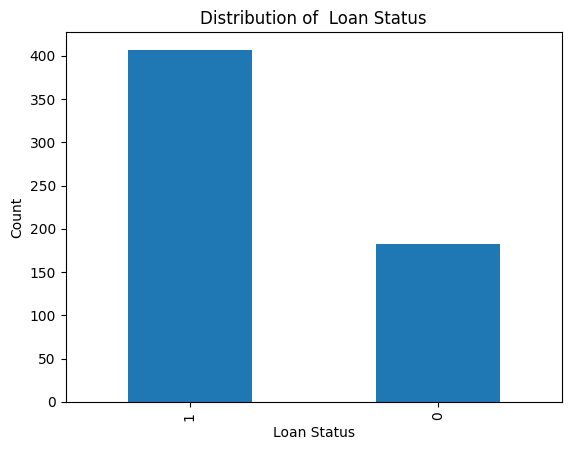

In [27]:
fraud_distribution = df['Loan_Status'].value_counts()
fraud_distribution.plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of  Loan Status')
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
def metrics_all(y_true, y_pred):
    print(accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Not-Accepted', 'Accepted'])
    plt.figure(figsize=(15, 10))
    plt.rcParams.update({'font.size':12})
    disp.plot()
    plt.show()

# preparing the Data for model

In [29]:
X = df.drop(columns=[ 'Loan_ID','Loan_Status','Education', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term'])
Y = df['Loan_Status']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

# Logistic Regression 

In [31]:
from sklearn.linear_model import LogisticRegression

LogisticRegression_model = LogisticRegression(n_jobs=-1, random_state = 42)

In [32]:
LogisticRegression_model.fit(X_train,Y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [33]:
Logistic_prediction = LogisticRegression_model.predict(X_test)

0.8531073446327684
              precision    recall  f1-score   support

           0       0.91      0.47      0.62        45
           1       0.84      0.98      0.91       132

    accuracy                           0.85       177
   macro avg       0.88      0.73      0.76       177
weighted avg       0.86      0.85      0.83       177



<Figure size 1500x1000 with 0 Axes>

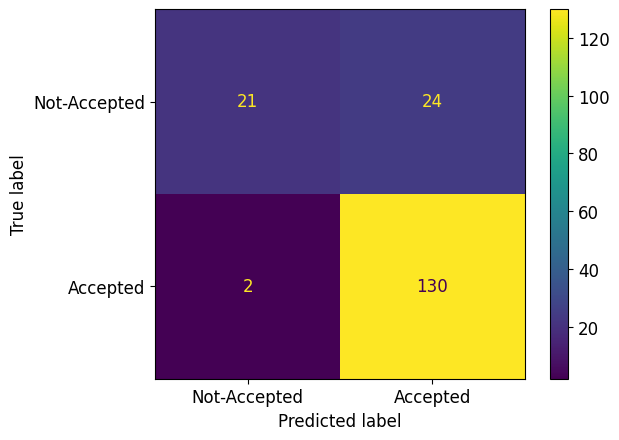

In [34]:
metrics_all(Y_test,Logistic_prediction)

# RF 

In [35]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_jobs=-1, random_state= 7)

In [36]:
RandomForest_model.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=-1, random_state=7)

In [37]:
RandomForest_prediction = RandomForest_model.predict(X_test)

0.8192090395480226
              precision    recall  f1-score   support

           0       0.69      0.53      0.60        45
           1       0.85      0.92      0.88       132

    accuracy                           0.82       177
   macro avg       0.77      0.72      0.74       177
weighted avg       0.81      0.82      0.81       177



<Figure size 1500x1000 with 0 Axes>

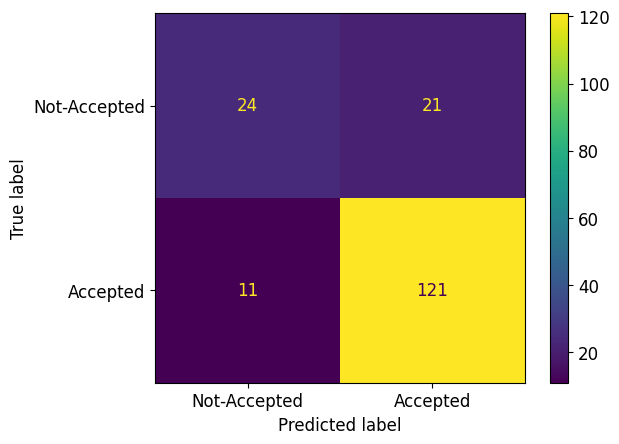

In [38]:
metrics_all(Y_test,RandomForest_prediction)

# Model Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=RandomForest_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, Y_train)
print("Best parameters: ", grid_search.best_params_)


Best parameters:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [40]:
RandomForest_model_aftergridsearch = RandomForestClassifier(n_jobs=-1, max_depth= None, n_estimators= 100, bootstrap= True , min_samples_leaf= 4,min_samples_split= 10, random_state= 7 )

In [41]:
RandomForest_model_aftergridsearch.fit(X_train, Y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10, n_jobs=-1,
                       random_state=7)

In [42]:
RandomForest_prediction_after = RandomForest_model_aftergridsearch.predict(X_test)

0.847457627118644
              precision    recall  f1-score   support

           0       0.88      0.47      0.61        45
           1       0.84      0.98      0.91       132

    accuracy                           0.85       177
   macro avg       0.86      0.72      0.76       177
weighted avg       0.85      0.85      0.83       177



<Figure size 1500x1000 with 0 Axes>

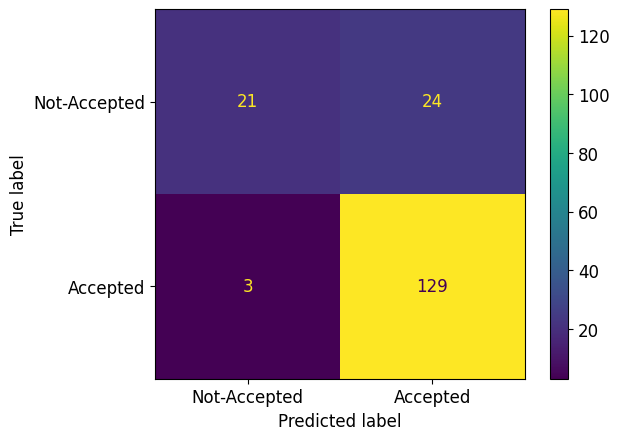

In [43]:
metrics_all(Y_test,RandomForest_prediction_after)

In [44]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree_model = DecisionTreeClassifier()

In [45]:
DecisionTree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [46]:
DecisionTree_prediction = DecisionTree_model.predict(X_test)

0.7175141242937854
              precision    recall  f1-score   support

           0       0.45      0.56      0.50        45
           1       0.84      0.77      0.80       132

    accuracy                           0.72       177
   macro avg       0.65      0.66      0.65       177
weighted avg       0.74      0.72      0.73       177



<Figure size 1500x1000 with 0 Axes>

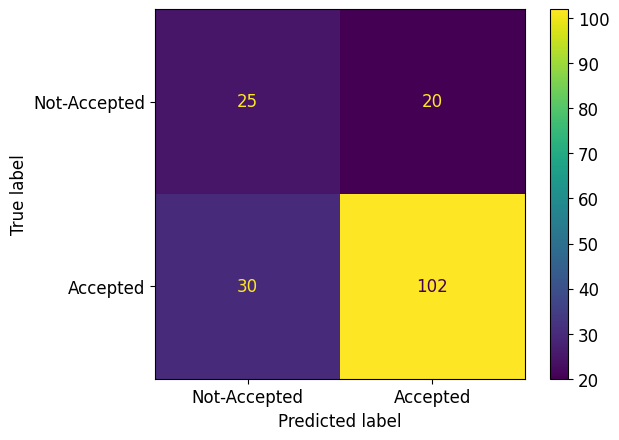

In [47]:
metrics_all(Y_test,DecisionTree_prediction)

In [48]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor


In [49]:

xgbmodel = XGBClassifier(njobs = -1)

xgbmodel.fit(X_train, Y_train)

c:\Users\moham\anaconda3\envs\ML\Lib\site-packages\xgboost\core.py:160: UserWarning: [09:49:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "njobs" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, njobs=-1,
              num_parallel_tree=None, ...)

In [50]:
xgb_y_pred = xgbmodel.predict(X_test)

0.8305084745762712
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        45
           1       0.87      0.91      0.89       132

    accuracy                           0.83       177
   macro avg       0.78      0.75      0.77       177
weighted avg       0.82      0.83      0.83       177



<Figure size 1500x1000 with 0 Axes>

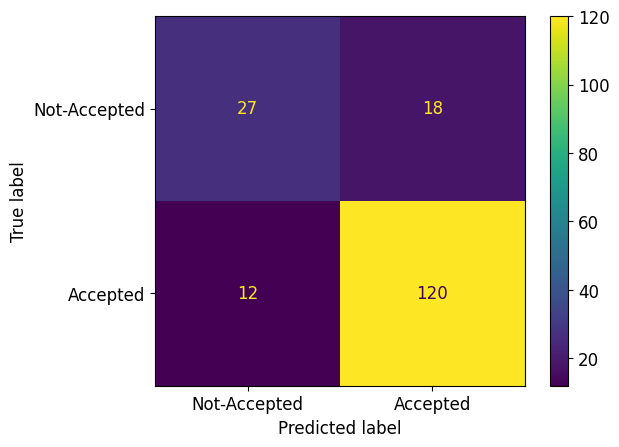

In [51]:
metrics_all(Y_test, xgb_y_pred)

In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, Y_train)


In [53]:
RandomForest_model_smote = RandomForestClassifier(n_jobs=-1)

In [54]:
RandomForest_model_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_jobs=-1)

In [55]:
RandomForest_prediction_smote = RandomForest_model_smote.predict(X_test)

0.8135593220338984
              precision    recall  f1-score   support

           0       0.63      0.64      0.64        45
           1       0.88      0.87      0.87       132

    accuracy                           0.81       177
   macro avg       0.75      0.76      0.76       177
weighted avg       0.81      0.81      0.81       177



<Figure size 1500x1000 with 0 Axes>

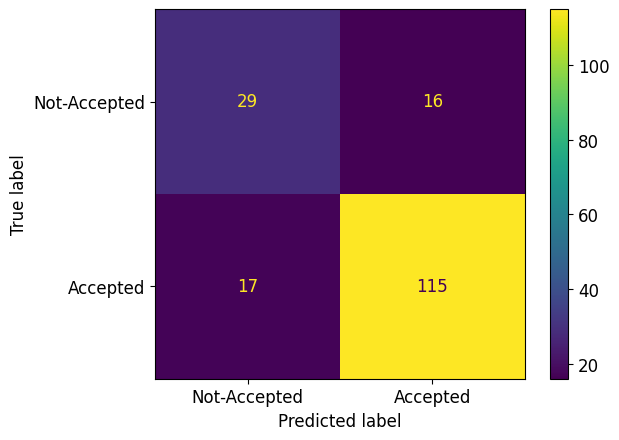

In [56]:
metrics_all(Y_test,RandomForest_prediction_smote)

# Get feature importance


In [57]:
feature_importance = RandomForest_model_aftergridsearch.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                    Feature  Importance
5            Credit_History    0.434788
3           ApplicantIncome    0.129262
9               TotalIncome    0.122963
10          LoanIncomeRatio    0.120197
4         CoapplicantIncome    0.075700
2                Dependents    0.033930
6       Property_Area_Rural    0.023107
1                   Married    0.018905
7   Property_Area_Semiurban    0.018704
8       Property_Area_Urban    0.013021
0                    Gender    0.009423


# Testing Model with New Customer Data

In [58]:
test = pd.read_csv('./New Customer.csv')

In [59]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [61]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Removing NUlls for Categorical values

In [62]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_16112\592060972.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_16112\592060972.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [63]:
test.duplicated().sum()

0

# Encoding

In [64]:
test = pd.get_dummies(test,columns = ['Property_Area'])
test['Property_Area_Semiurban'] = test['Property_Area_Semiurban'].astype('int')
test['Property_Area_Urban'] = test['Property_Area_Urban'].astype('int')
test['Property_Area_Rural'] = test['Property_Area_Rural'].astype('int')

columns_to_encode = ['Gender', 'Married','Education','Self_Employed']
for column in columns_to_encode:
    test[column] = label_encoder.fit_transform(test[column])

In [65]:
test['Dependents'] = test['Dependents'].str.replace(' ', '').str.replace('+', '')
test['Dependents'] = pd.to_numeric(test['Dependents'], errors='coerce') #errors='coerce': This will replace any non-convertible values with NaN

In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  367 non-null    object 
 1   Gender                   367 non-null    int32  
 2   Married                  367 non-null    int32  
 3   Dependents               367 non-null    int64  
 4   Education                367 non-null    int32  
 5   Self_Employed            367 non-null    int32  
 6   ApplicantIncome          367 non-null    int64  
 7   CoapplicantIncome        367 non-null    int64  
 8   LoanAmount               362 non-null    float64
 9   Loan_Amount_Term         361 non-null    float64
 10  Credit_History           338 non-null    float64
 11  Property_Area_Rural      367 non-null    int32  
 12  Property_Area_Semiurban  367 non-null    int32  
 13  Property_Area_Urban      367 non-null    int32  
dtypes: float64(3), int32(7), i

In [67]:
credit_mode_value = test['Credit_History'].mode()[0]
test['Credit_History'].fillna(credit_mode_value, inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(), inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_16112\2779631200.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Credit_History'].fillna(credit_mode_value, inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_16112\2779631200.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [68]:
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test['LoanIncomeRatio'] = test['LoanAmount'] / test['TotalIncome']

In [69]:
scaler = StandardScaler()
test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])


In [70]:
z_scores = stats.zscore(test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
test = test[(abs(z_scores) < 3).all(axis=1)]


In [71]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,LoanIncomeRatio
0,LP001015,1,1,0,0,0,0.186461,-0.673335,-0.426780,0.266022,1.0,0,0,1,5720,0.019231
1,LP001022,1,1,1,0,0,-0.352692,-0.029848,-0.163953,0.266022,1.0,0,0,1,4576,0.027535
2,LP001031,1,1,2,0,0,0.039641,0.098849,1.183033,0.266022,1.0,0,0,1,6800,0.030588
3,LP001035,1,1,2,0,0,-0.502774,0.418877,-0.591047,0.266022,1.0,0,0,1,4886,0.020467
4,LP001051,1,0,0,1,0,-0.311909,-0.673335,-0.952433,0.266022,1.0,0,0,1,3276,0.023810


In [72]:
x_for_test = test.drop(columns=[ 'Loan_ID','Education', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term'])

In [73]:
x_test_for_Logistic_prediction = LogisticRegression_model.predict(x_for_test)

In [74]:
x_test_for_RandomForest_model_aftergridsearch = RandomForest_model_aftergridsearch.predict(x_for_test)

In [75]:
print(x_test_for_RandomForest_model_aftergridsearch)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [76]:
test['Loan_Status'] = x_test_for_RandomForest_model_aftergridsearch

In [77]:

married_semiurban = test[(test['Married'] == 1) & (test['Property_Area_Semiurban'] == 1)]

loans_obtained = married_semiurban['Loan_Status'].sum()

percentage = (loans_obtained / len(married_semiurban)) * 100
print(f"Percentage of married people in semiurban areas who obtained the loan: {percentage:.2f}%")


Percentage of married people in semiurban areas who obtained the loan: 79.71%
